In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Re-run this cell before training.

import time
import numpy as np
import torch
import torch.nn.functional as F
import math
import matplotlib.pyplot as plt
from torchsummary import summary
import tensorflow as tf
from skimage.transform import resize

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

def normalize(picture):
    normalizedPicture = (picture - np.min(picture)) / (np.max(picture) - np.min(picture))
    return normalizedPicture


x_train = normalize(x_train)
x_test  = normalize(x_test)

x_train = torch.tensor(x_train).float().cuda()
x_train = x_train.view(-1, 28*28)
y_train = torch.tensor(y_train).float().cuda()
x_test  = torch.tensor(x_test).float().cuda()
x_test  = x_test.view(-1, 28*28)
y_test  = torch.tensor(y_test).float().cuda()

print(x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
torch.Size([60000, 784])


In [ ]:
# Re-run cell 2 before training.

class ThreeLayerClassifierOne(torch.nn.Module):
    def __init__(self, input_dim=784, output_dim=10):
        super(ThreeLayerClassifierOne, self).__init__()
        self.linear1 = torch.nn.Linear(input_dim, 500)
        self.linear2 = torch.nn.Linear(500, 100)
        self.linear3 = torch.nn.Linear(100, output_dim)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        return self.linear3(x)

beg = time.time()

model1 = ThreeLayerClassifierOne().cuda()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=0.01)
all_loss=[]

for epoch in range(1000):
    output = model1(x_train)
    loss = criterion(output, y_train.long())
    all_loss.append(loss.item())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

end = time.time()

total1 = end - beg

print(f'Total time: {total1} seconds.')

Total time: 84.98018169403076 seconds.


In [ ]:
predictions = model1(x_test)
pred_classes = predictions.max(1).indices

print('Entry   Prediction   Ground Truth')
for i in range(len(predictions)):
    if pred_classes[i].item() != y_test[i].item():
        print(f'{i:5d}{int(pred_classes[i].item()):13d}{int(y_test[i]):15d}')

accuracy1 = ((pred_classes == y_test).sum().item() / pred_classes.shape[0]) * 100
print(f'\nAccuracy: {accuracy1:.2f}%')

Entry   Prediction   Ground Truth
    6            9              4
    8            6              5
   15            3              5
   18            8              3
   20            7              9
   33            6              4
   38            3              2
   42            9              4
   46            8              1
   48            9              4
   53            3              5
   54            2              6
   61            2              8
   62            4              9
   63            2              3
   65            9              4
   66            2              6
   73            8              9
   77            7              2
   78            8              9
   80            9              7
   87            5              3
   97            8              7
  104            4              9
  111            1              7
  124            9              7
  125            4              9
  144            9              7
  149         

In [ ]:
# Re-run cell 2 before training.

class ThreeLayerClassifierTwo(torch.nn.Module):
    def __init__(self, input_dim=784, output_dim=10):
        super(ThreeLayerClassifierTwo, self).__init__()
        self.linear1 = torch.nn.Linear(input_dim, 400)
        self.linear2 = torch.nn.Linear(400, 100)
        self.linear3 = torch.nn.Linear(100, 50)
        self.linear4 = torch.nn.Linear(50, output_dim)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        return self.linear4(x)

beg = time.time()

model2 = ThreeLayerClassifierTwo().cuda()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.01)
all_loss=[]

for epoch in range(1000):
    output = model2(x_train)
    loss = criterion(output, y_train.long())
    all_loss.append(loss.item())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

end = time.time()
total2 = end - beg

print(f'Total time: {total2} seconds.')

Total time: 80.24646067619324 seconds.


In [ ]:
predictions = model2(x_test)
pred_classes = predictions.max(1).indices

print('Entry   Prediction   Ground Truth')
for i in range(len(predictions)):
    if pred_classes[i].item() != y_test[i].item():
        print(f'{i:5d}{int(pred_classes[i].item()):13d}{int(y_test[i]):15d}')

accuracy2 = ((pred_classes == y_test).sum().item() / pred_classes.shape[0]) * 100
print(f'\nAccuracy: {accuracy2:.2f}%')

Entry   Prediction   Ground Truth
    6            7              4
    8            6              5
    9            7              9
   15            3              5
   16            4              9
   18            8              3
   20            7              9
   22            2              6
   23            8              5
   33            0              4
   42            9              4
   45            8              5
   52            4              5
   54            2              6
   59            7              5
   61            6              8
   62            4              9
   63            2              3
   65            9              4
   66            2              6
   73            1              9
   77            7              2
   78            1              9
   87            5              3
   92            8              9
   97            1              7
  102            7              5
  104            4              9
  105         

In [ ]:
# Re-run cell 2 before training.

class ThreeLayerClassifierThree(torch.nn.Module):
    def __init__(self, input_dim=784, output_dim=10):
        super(ThreeLayerClassifierThree, self).__init__()
        self.linear1 = torch.nn.Linear(input_dim, 600)
        self.linear2 = torch.nn.Linear(600, 500)
        self.linear3 = torch.nn.Linear(500, 400)
        self.linear4 = torch.nn.Linear(400, 300)
        self.linear5 = torch.nn.Linear(300, output_dim)

    def forward(self, x):
        x = F.sigmoid(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.sigmoid(self.linear3(x))
        x = F.relu(self.linear4(x))
        return self.linear5(x)

beg = time.time()

model3 = ThreeLayerClassifierThree().cuda()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model3.parameters(), lr=0.01)
all_loss=[]

for epoch in range(1000):
    output = model3(x_train)
    loss = criterion(output, y_train.long())
    all_loss.append(loss.item())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

end = time.time()
total3= end-beg


print(f'Total time: {total3} seconds.')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Total time: 250.1133427619934 seconds.


In [ ]:
predictions = model3(x_test)
pred_classes = predictions.max(1).indices

print('Entry   Prediction   Ground Truth')
for i in range(len(predictions)):
    if pred_classes[i].item() != y_test[i].item():
        print(f'{i:5d}{int(pred_classes[i].item()):13d}{int(y_test[i]):15d}')

accuracy3 = ((pred_classes == y_test).sum().item() / pred_classes.shape[0]) * 100
print(f'\nAccuracy: {accuracy3:.2f}%')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Streaming output truncated to the last 5000 lines.
 4370            1              0
 4371            1              8
 4372            1              8
 4373            1              4
 4374            1              5
 4375            1              8
 4376            1              8
 4377            1              4
 4378            1              5
 4379            1              4
 4380            1              8
 4381            1              5
 4382            1              4
 4383            1              9
 4384            1              2
 4385            1              2
 4387            1              2
 4388            1              6
 4389            1              8
 4390            1              8
 4391            1              7
 4392            1              0
 4393            1              3
 4394            1              6
 4395            1              6
 4396            1              4
 4397            1              3
 4398            1             

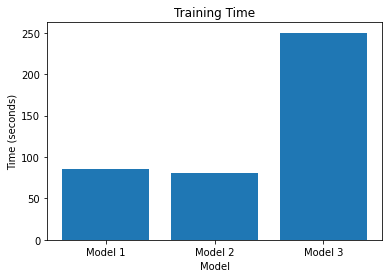

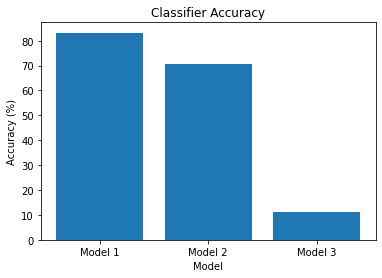

In [ ]:
models     = ['Model 1', 'Model 2', 'Model 3']
times      = [total1, total2, total3]
accuracies = [accuracy1, accuracy2, accuracy3]

plt.bar(models, times)
plt.title('Training Time')
plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.show()

plt.bar(models, accuracies)
plt.title('Classifier Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.show()

In [ ]:
!jupyter nbconvert --to html "/content/drive/Shareddrives/Compv5/NeuralNetworkLab/NeuralNetwork.ipynb"

[NbConvertApp] Converting notebook /content/drive/Shareddrives/Compv5/NeuralNetworkLab/NeuralNetwork.ipynb to html
[NbConvertApp] Writing 658231 bytes to /content/drive/Shareddrives/Compv5/NeuralNetworkLab/NeuralNetwork.html
